<a href="https://colab.research.google.com/github/maciejskorski/autocorrelations_trng/blob/main/notebooks/drift_pseudorandomness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

Recall that raw bits generated from oscillator-based TRNG are sampled first digits of Brownian motion with drift.

How does this drift impact pseudorandom properties and autocorrelation?

Note that we don't want pseudorandom properties of the drift to fool us :-)

In [1]:
# run to install on Colab

!pip install --upgrade pip --quiet
!git clone https://github.com/maciejskorski/deep_correlations_trng.git --quiet
%cd deep_correlations_trng
!pip install . --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.7 MB/s eta 0:00:00
/content/deep_correlations_trng
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 5.3 MB/s eta 0:00:00


In [2]:
try:
    from importlib.resources import files
except:
    from importlib_resources import files
from deep_correlations_trng.utils import read_bits
from deep_correlations_trng import data

from statsmodels.graphics.tsaplots import acf,plot_acf
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')


plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

data_files = files(data).joinpath('experiment1').rglob('*.bin')
data_files = list(data_files)
data_files

[PosixPath('/usr/local/lib/python3.8/dist-packages/deep_correlations_trng/data/experiment1/acq_20230118155436_dff.bin'),
 PosixPath('/usr/local/lib/python3.8/dist-packages/deep_correlations_trng/data/experiment1/acq_20230118155612_dff.bin')]

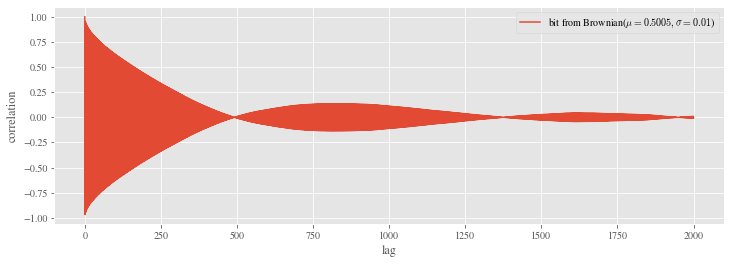

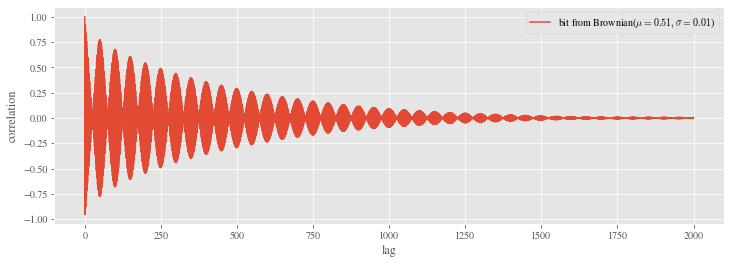

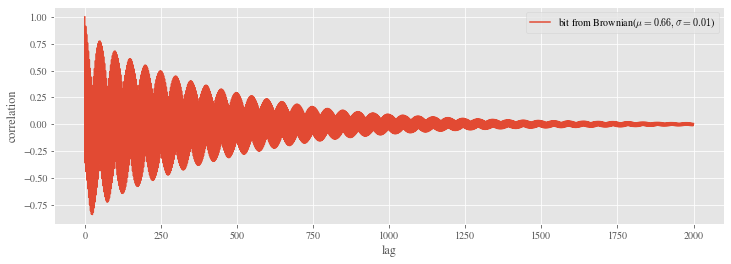

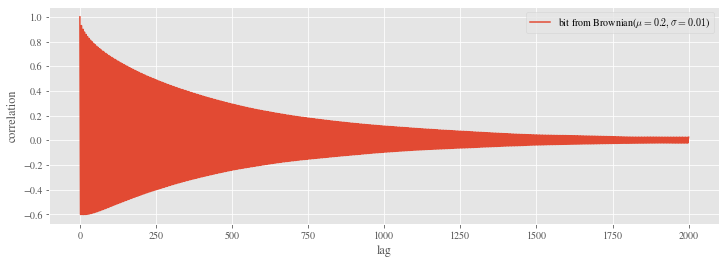

In [3]:
sigma = 0.01
for mu in [0.5005,0.51,0.66,0.2]:
    location = np.cumsum(np.random.normal(mu,sigma,size=(1000000)))
    phases = (0.0+location)%1
    bits = (phases < 1/2).astype('int')
    fig,ax = plt.subplots(figsize=(12,4))
    nlags = 2000
    lags = np.arange(nlags+1)
    ax.plot(lags, acf(bits,nlags=nlags,fft=True),label=f'bit from Brownian($\mu={mu},\sigma={sigma}$)')
    ax.legend()
    ax.set_xlabel('lag')
    ax.set_ylabel('correlation')
    plt.show()